# Example : non stable SIR model 

This file contains the example of a (simple) mean field model of an SIR dynamics that has a unique fixed point that is not always exponentially stable (depending on the parameters "a" of the model). 

- For steady-state expectation, the refined mean field approximation cannot be applied when the fixed point is not expoentially stable. 
- We also show in this case, some problems arrise even for the transient regime

In [1]:
# To load the library
import rmf_tool.src.rmf_tool as rmf

# To plot the results
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

In [2]:
# This code creates an object that represents a "density dependent population process"
ddpp = rmf.DDPP() 
# We then add the three transitions : 
ddpp.add_transition([-1,1],lambda x: x[0]*(1 + 10*x[1]/(a+x[0])))
ddpp.add_transition([0,-1],lambda x: 5*x[1])
ddpp.add_transition([1,0],lambda x: (10*x[0] + 0.1)*(1-x[0]-x[1]))
ddpp.set_initial_state([0.5,0.5])

## Stability
As we can see on the figures below : 
* For $a=0.1$, the stable point is not an attractor
* For $a=0.5$, the stable point is an attractor 

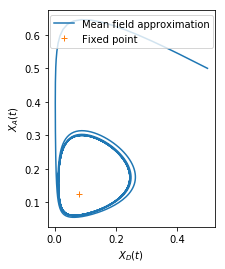

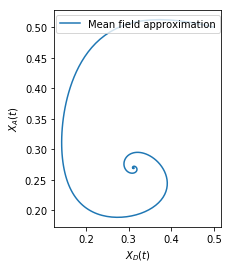

In [3]:
for a in [0.1,0.5]:
    f = plt.figure()
    f.set_size_inches(3,4)
    plt.xlabel('$X_D(t)$')
    plt.ylabel('$X_A(t)$')
    t,x=ddpp.ode(time=10)
    plt.plot(x[:,0],x[:,1])
    if a==0.1:
        plt.plot([0.078],[0.126],'+')
    plt.legend(('Mean field approximation','Fixed point'),loc='upper center')
    f.savefig('output_pdfs/SIR_2D_a0{}.pdf'.format(int(a*10)),bbox_inches='tight')

## Refined mean field ($O(1/N)$ and $O(1/N^2)$-expansion) and comparison with simulations


In [4]:
# To faster the computation, the simulation have been pre-computed. 
from rmf_tool.misc.SIR_simulate.averageSIR import *

### Figure for paper (unstable SIR model)

time to compute drift= 0.3038308620452881
200 0.1 computed in  0.0015943050384521484 seconds
500 0.1 computed in  0.0017008781433105469 seconds
1000 0.1 computed in  0.0015320777893066406 seconds
time to compute drift= 0.3119533061981201
200 0.5 computed in  0.0017018318176269531 seconds
500 0.5 computed in  0.0018150806427001953 seconds
1000 0.5 computed in  0.0019707679748535156 seconds


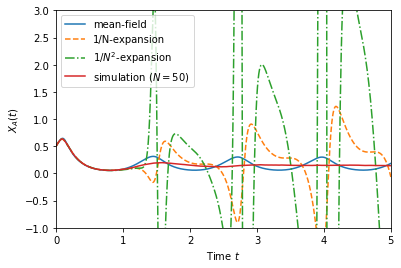

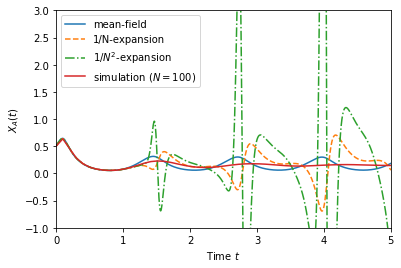

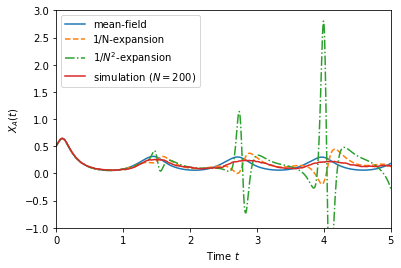

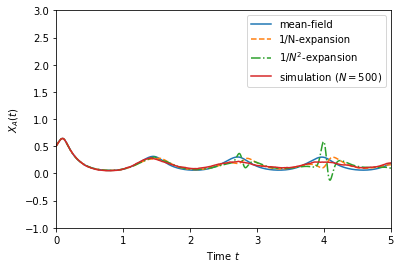

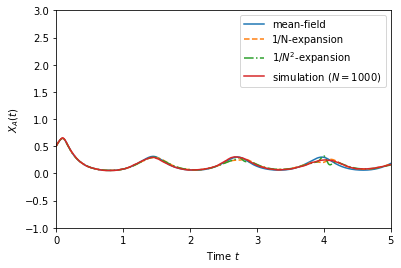

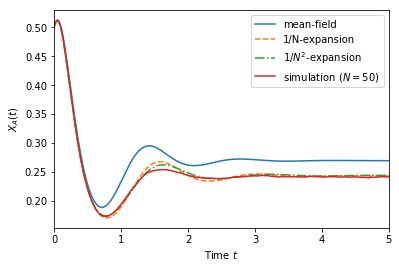

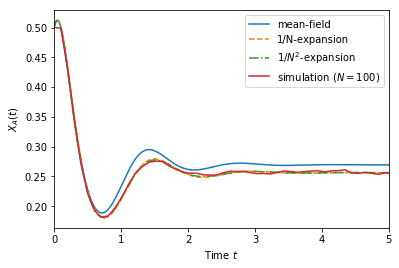

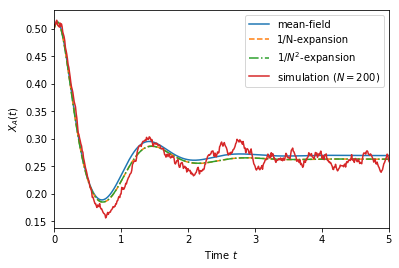

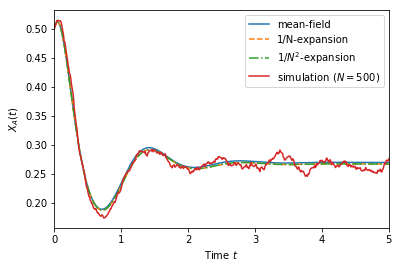

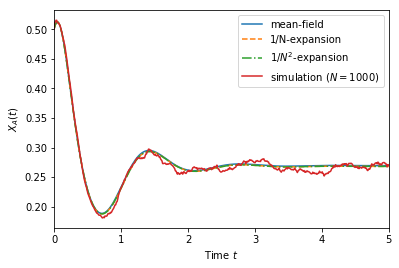

In [5]:
for a in [0.1,0.5]:
    T,X,V,A,XVWABCD = ddpp.meanFieldExpansionTransient(time=5,order=2)
    for N in [50,100,200,500,1000]:
        f = plt.figure()
        i=1
        n=2
        plt.plot(T,X[:,i])
        plt.plot(T,(X+V/N)[:,i],'--')
        plt.plot(T,(X+V/N+A/N**2)[:,i],'-.')
        Tsimu,Ssimu,Isimu = averageTraj(N,a,10)
        if i==0:
            plt.plot(Tsimu,Ssimu)
        else:
            plt.plot(Tsimu,Isimu)
        plt.legend(('mean-field','1/N-expansion','$1/N^2$-expansion','simulation ($N={}$)'.format(N)))
        plt.xlim([0,5])
        if a==0.1:
            plt.ylim([-1,3])
        if i==1:
            plt.ylabel('$X_A(t)$')
        elif i==0:
            plt.ylabel('$X_D(t)$')
        plt.xlabel('Time $t$')
        f.savefig('output_pdfs/SIR_a0{}_N{}.pdf'.format(int(a*10),N),bbox_inches='tight')


# MISC : 2D vision of what happens in the sable and unstable case

time to compute drift= 0.4819529056549072
50 0.1 computed in  0.0030231475830078125 seconds
time to compute drift= 0.22744011878967285


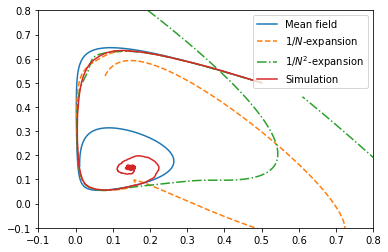

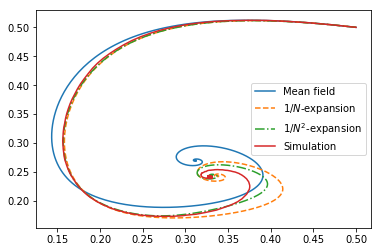

In [6]:
N=50
for a in [0.1,0.5]:
    if a == 0.1:
        T,X,V,A,XVWABCD = ddpp.meanFieldExpansionTransient(order=2,time=1.7)
    else:
        T,X,V,A,XVWABCD = ddpp.meanFieldExpansionTransient(order=2,time=5)
        
    Tsimu,Ssimu,Isimu = averageTraj(N,a,1000)
    
    f=plt.figure()
    plt.plot(X[:,0],              X[:,1]              ,'-')   # Mean field
    plt.plot((X+V/N)[:,0],       (X+V/N)[:,1]         ,'--')  # 1/N-expansion
    plt.plot((X+V/N+A/N**2)[:,0], (X+V/N+A/N**2)[:,1]  ,'-.') # 1/N^2-expansion
    plt.plot(Ssimu,Isimu)                                     # Simu
    plt.legend(('Mean field', '$1/N$-expansion','$1/N^2$-expansion','Simulation'))
    if a==0.1:
        plt.xlim([-.1,.8])
        plt.ylim([-.1,.8])
    f.savefig('output_pdfs/SIR_2D_a0{}_N{}.pdf'.format(int(10*a),N),bbox_inches='tight')
